# CNJCx Week 5: Practical Python

Tyler Benster
(tbenst@stanford.edu)

## Outline
### Motivation and background
### Hands-on coding

### Motivation and background
- Goals
- Anti-goals
- Extra details
- Tidy Data
- Today's Python Packages

## Goals for today
- "Day in the life" of a Pythonista
- Whirlwhind tour of foudational packages for Data Scientists in Python
- Exposure to opinionated best-practices for formating data and code
- understand the "why" of each code block
- know which library to use for particular analyses

## Anti-goals for today
- comprehend the "how" of each line of code
- know which function to use for particular analyses
- understand the math behind shown analyses
- feeling that the class is going at a comfortable pace
- understand how this presentation was made in a Jupyter notebook with RISE/reveal.js

## Extra details for eager or advanced listeners
- <details>
    <summary><a><strong>IYI</strong></a>: If You're Interested; click me! (no seriously please do :)</summary>
    Optional content will be prefaced by IYI. This is not essential for understanding the presentation, and if you are at all feeling lost or confused, now is a great time to ignore what I'm saying and ask questions in the chat. IYI is inspired by David Foster Wallace's Infinite Jest.
</details>
- Bonus: quick peak at modern deep learning in Pytorch

## Easy visualization with Tidy Data
![tidy data](https://r4ds.had.co.nz/images/tidy-1.png)

See Hadley Wickham's [publication](https://www.jstatsoft.org/article/view/v059i10) for more details and motivation.

### Hands-on coding
- Data visualization: how to make some basic plots (matplotlib, Altair)
- (5 minute break)
- Advanced data analysis: interrogate the data and visualize(scipy.stats, sklearn)
- how to read in common data formats (csv)
- data munging: what data structures and patterns to use for optimal efficiency (numpy, pytorch tensor, pandas, tidy data)

## Get this notebook running
1. open a terminal
2. navigate to folder where you want the code, e.g. `mkdir -p ~/code && cd code`
3. git clone

## First-up: matplotlib
matplotlib is the most popular plotting library in Python, and is a swiss army knife that can do virtually anything. It's also the most manual difficult to use.

Let's load some example data first

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# load data
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
for key, value in iris.items():
    if not key in ['data', 'target']:
        print(f"=========\n{key}: {value}")

target_names: ['setosa' 'versicolor' 'virginica']
DESCR: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high

Let's create a basic scatter plot using the procedural (scripting) interface

In [7]:
iris.data.shape

(150, 4)

Text(0, 0.5, 'petal length (cm)')

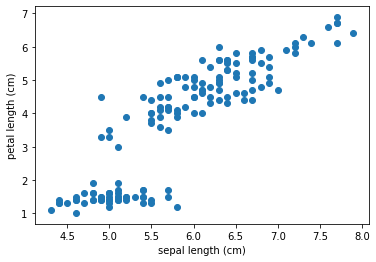

In [8]:
plt.scatter(iris.data[:,0], iris.data[:,2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

Now, we create subplots with coloring & legend using the alternate Object-oriented interface

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

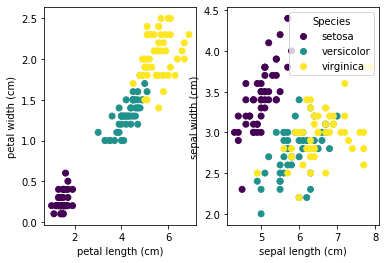

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=2)
axes[0].scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
axes[0].set_xlabel(iris.feature_names[2])
axes[0].set_ylabel(iris.feature_names[3])
scatter1 = axes[1].scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
axes[1].set_xlabel(iris.feature_names[0])
axes[1].set_ylabel(iris.feature_names[1])
axes[1].legend(scatter1.legend_elements()[0],
               iris.target_names, title="Species")

Uh oh, that looks terrible. Here's a quick fix:

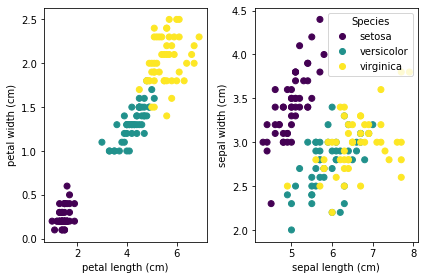

In [18]:
fig.tight_layout()
fig

Better, but legend location still problematic.

**IYI**: This can be fixed using low-level arguments like `bbox`, see [here](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)

## Surely there's a better way??
Introducing the "Grammar of Graphics"! Other python GoG packages include Seaborn and Holoviews. We use **Altair**, as it is implemented on the cross-language Vega-lite, so what you learn today can also be done in Julia or even used for interactive web-charts!

![grammar of graphics](https://miro.medium.com/max/2000/1*mcLnnVdHNg-ikDbHJfHDNA.png)

**IYI** conceptual guide [here](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)

## Introducing pandas: convient tables in python

First, let's install a python package with example datasets

In [19]:
!pip install vega_datasets

Next we load an example DataFrame

In [26]:
from vega_datasets import data
import altair as alt, pandas as pd

cars_df = data.cars()
print(f"object type: {type(cars_df)}")

object type: <class 'pandas.core.frame.DataFrame'>


DataFrames have some convenient methods to help us inspect it

In [28]:
cars_df.head(2)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA


In [29]:
cars_df.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [30]:
cars_df.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
405,chevy s-10,31.0,4,119.0,82.0,2720,19.4,1982-01-01,USA


Some of these methods can be chained:

In [31]:
cars_df.Name.tail()

401    ford mustang gl
402          vw pickup
403      dodge rampage
404        ford ranger
405         chevy s-10
Name: Name, dtype: object

Here we select a single value

In [32]:
cars_df["Name"][402]

'vw pickup'

Let's take a look at the type of each Series (column)

In [33]:
cars_df.dtypes

Name                        object
Miles_per_Gallon           float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Weight_in_lbs                int64
Acceleration               float64
Year                datetime64[ns]
Origin                      object
dtype: object

Let's see the various Origins

In [34]:
cars_df.Origin.unique()

array(['USA', 'Europe', 'Japan'], dtype=object)

We can easily do `where` queries

In [35]:
cars_df[cars_df.Origin=='USA'].head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Or chain multiple requirements

In [36]:
np.all?

In [39]:
from datetime import datetime
idxs = np.all([cars_df.Origin=='USA',
              cars_df.Horsepower>200,
              cars_df.Year<=datetime(1972,1,1)],
             axis=0)
cars_df[idxs]

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970-01-01,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970-01-01,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970-01-01,USA
19,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,1970-01-01,USA
31,ford f250,10.0,8,360.0,215.0,4615,14.0,1970-01-01,USA
33,dodge d200,11.0,8,318.0,210.0,4382,13.5,1970-01-01,USA
74,mercury marquis,11.0,8,429.0,208.0,4633,11.0,1972-01-01,USA


# Plotting Tidy Data with Altair
Since our data is Tidy, we can use the Grammar of Graphics to make plots!

In [40]:
line = alt.Chart(cars_df).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)
# https://altair-viz.github.io/user_guide/generated/core/altair.ErrorBandDef.html#altair.ErrorBandDef
band = alt.Chart(cars_df).mark_errorband(extent='ci').encode(
    x='Year',
    y=alt.Y('Miles_per_Gallon', title='Miles/Gallon'),
)

band + line

alt.LayerChart(...)

The power of this approach becomes especially apparent with complex plots that would require a lot of work for each axis with matplotlib

In [43]:
line = alt.Chart(cars_df).mark_line().encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', title="average MPG"),
    color='Cylinders:O' # we specify that the data is Ordinal, meaning ordered
).properties(
    width=180,
    height=180
).facet(
    facet='Origin:N', # data is Nominal, meaning categorical
    columns=3
)
line

alt.FacetChart(...)

### Excercise 1: make a scatter plot of Horsepower vs Acceleration, colored by Origin
Instead of `mark_line`, use `mark_point`

In [45]:
# your code here...feel free to refer to cells above!
alt.Chart(cars_df).mark_point().encode(
    x="Horsepower",
    y="Acceleration",
    color="Origin"
)

alt.Chart(...)

Let's quickly revist the Iris dataset and show off our new skills!

In [48]:
iris_df = data.iris()

alt.Chart(iris_df).mark_circle().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)),
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalWidth'
)

alt.Chart(...)

Finally, **IYI**, here's a more advanced figure: an interactive scatter & Violin plot using `selection`, `transform_filter`, and `transform_density`

In [49]:
brush = alt.selection(type='interval', resolve='global')
scatter = alt.Chart(cars_df).mark_point().encode(
    x=alt.X('Horsepower'),
    y=alt.Y('Acceleration'),
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray'))
)

violin = alt.Chart(cars_df).transform_filter(
    brush
).transform_density(
    'Miles_per_Gallon',
    as_=['Miles_per_Gallon', 'density'],
    extent=[5, 50],
    groupby=['Origin']
).mark_area(orient='horizontal').encode(
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    column=alt.Column(
        'Origin:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=100
)


plot = (scatter | violin).add_selection(
# scatter.add_selection(
    brush
).configure_facet(
     spacing=0
).configure_view(
    stroke=None
)

In [50]:
# try drawing a box on the scatter plot!B
plot

alt.HConcatChart(...)

For more, checkout this example gallery of beautiful plots with shockingly few lines of code: https://altair-viz.github.io/gallery/index.html

## (5 minute break)

**IYI** A poem while we wait

In [51]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Data munging

Suppose you get data from a collaborator. How might you read a csv and convert to Tidy Data?

We'll look at some data collected by Darwin Babino @ University of Washington. Each row contains the trial-summed response to a 0.5s flash of light

In [58]:
# Read in csv file to DataFrame
rgcs_df = pd.read_csv("rgc_light_response.csv")

# Each column with number is a 1ms time bin that sums
# the number of Action potentials from `ntrials`.
# i, j index the 2D electrode array.
# unit_num identifies puported individual neurons recorded from each electrode.
rgcs_df.head(5)

,retina,id,i,j,unit_num,ntrials,0,1,2,3,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_1",3,6,1,18,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Note: if you're coming from Matlab, you might be tempted to write a for loop
# sometimes this can't be avoided, but in general writing for-loops is discouraged
# in Python. They are slow in interpreted languages and usually there's a better way

rgcs_tidy = pd.melt(rgcs_df, id_vars=['retina', 'id', 'ntrials'],
        var_name="time_bin",
        value_name="spike_count",
        value_vars=list(map(str, np.arange(3500))))
rgcs_tidy

,retina,id,ntrials,time_bin,spike_count
0,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_1",18,0,0.0
1,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_3",18,0,0.0
2,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_0",18,0,0.0
3,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_5",18,0,0.0
4,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_4",18,0,0.0
...,...,...,...,...,...
16593495,R1_E1_AMES_120min_grating_contrast,"R1_E1_AMES_120min_grating_contrast_(4, 4)_0",8,3499,0.0
16593496,R1_E1_AMES_120min_grating_contrast,"R1_E1_AMES_120min_grating_contrast_(4, 5)_0",8,3499,0.0
16593497,R1_E1_AMES_120min_grating_contrast,"R1_E1_AMES_120min_grating_contrast_(4, 5)_1",8,3499,0.0
16593498,R1_E1_AMES_120min_grating_contrast,"R1_E1_AMES_120min_grating_contrast_(4, 7)_0",8,3499,0.0


Normalize spike count by number of trials

In [61]:
# 1ms time bins
time_bin = 1000
rgcs_tidy["time"] = (pd.to_numeric(rgcs_tidy.time_bin) + 1) / time_bin
rgcs_tidy["firing_rate"] = rgcs_tidy.spike_count / rgcs_tidy.ntrials * time_bin
rgcs_tidy.drop(columns=["spike_count", "ntrials", "time_bin"], inplace=True)
rgcs_tidy

,retina,id,time,firing_rate
0,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_1",0.001,0.0
1,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_3",0.001,0.0
2,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_0",0.001,0.0
3,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_5",0.001,0.0
4,R1_E1_AMES_130min_checkerboard_contrast,"R1_E1_AMES_130min_checkerboard_contrast_(3, 6)_4",0.001,0.0
...,...,...,...,...
16593495,R1_E1_AMES_120min_grating_contrast,"R1_E1_AMES_120min_grating_contrast_(4, 4)_0",3.500,0.0
16593496,R1_E1_AMES_120min_grating_contrast,"R1_E1_AMES_120min_grating_contrast_(4, 5)_0",3.500,0.0
16593497,R1_E1_AMES_120min_grating_contrast,"R1_E1_AMES_120min_grating_contrast_(4, 5)_1",3.500,0.0
16593498,R1_E1_AMES_120min_grating_contrast,"R1_E1_AMES_120min_grating_contrast_(4, 7)_0",3.500,0.0


Instead, let's prepare to plot with matplotlib. First, we create a nSamples x nFeatures matrix

In [63]:
# effectively, this undoes our melt operation
rgcs_tidy.pivot(index='id', columns='time', values='firing_rate').head()

time,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,3.491,3.492,3.493,3.494,3.495,3.496,3.497,3.498,3.499,3.500
id,,,,,,,,,,,,,,,,,,,,,
"R1_E1_AMES_120min_grating_contrast_(0, 1)_0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"R1_E1_AMES_120min_grating_contrast_(0, 2)_0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"R1_E1_AMES_120min_grating_contrast_(0, 3)_0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"R1_E1_AMES_120min_grating_contrast_(0, 4)_0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"R1_E1_AMES_120min_grating_contrast_(0, 5)_0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# convert to ndarray
rgc_mat = np.array(rgcs_tidy.pivot(index='id', columns='time', values='firing_rate'))

(0, 3.5)

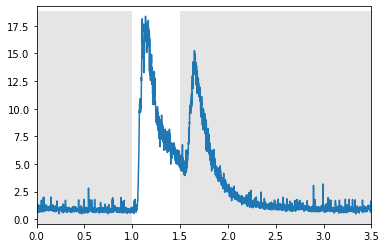

In [67]:
from matplotlib import patches
from typing import Tuple
time = np.arange(rgc_mat.shape[1])/1000 # convert to seconds
fig, ax = plt.subplots()
ax.plot(time, rgc_mat.mean(0))
ylim = ax.get_ylim()
# Create a Rectangle patch

def make_rect(start:float, duration:float, ylim:Tuple[float, float]):
    return patches.Rectangle((start, ylim[0]), duration, ylim[1],
                             facecolor='black', alpha=0.1)

# we make small helper function to follow DRY: Don't repeat yourself
rect1 = make_rect(0,1, ylim)
rect2 = make_rect(1.5,2, ylim)

# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.set_xlim(0,3.5)

## Calculating instantaneous firing rate
$\omega(\tau) = \frac{1}{\sqrt{2\pi}\sigma_\omega}\exp\left({-\frac{\tau^2}{2\sigma_\omega^2}}\right)$

(to type this in markdown):
```
$\omega(\tau) = \frac{1}{\sqrt{2\pi}\sigma_\omega}\exp\left({-\frac{\tau^2}{2\sigma_\omega^2}}\right)$
```

**IYI**: see 1.11 from [Dayan and Abbott](http://www.gatsby.ucl.ac.uk/~lmate/biblio/dayanabbott.pdf)

In [78]:
from scipy import signal
# estimate firing rate using gaussian smoothing
sigma = 6
bandwidth = 0.05 # sec
bin_width = 0.001
transformed_sigma = bandwidth/bin_width
window = signal.gaussian(2*sigma*transformed_sigma,
                         std=transformed_sigma)[None]

# instantaneous firing rate (acausal)
ifr = signal.convolve(rgc_mat, window,mode="same") \
             / (transformed_sigma*np.sqrt(2*np.pi))

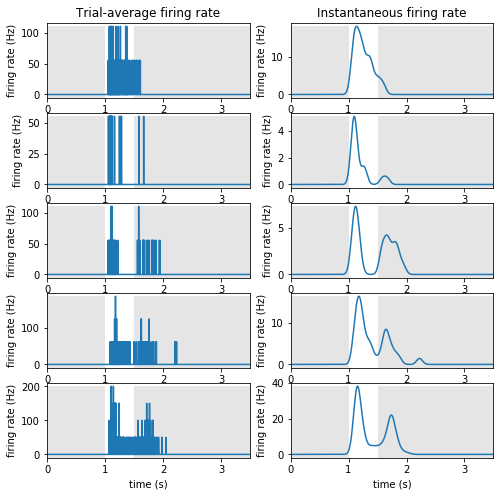

In [84]:
def plot_rgc_trace(ax, trace, time=time,
                   light_on=1, light_off=1.5):
    ax.plot(time,trace)
    ylim = ax.get_ylim()
    rect1 = make_rect(0,1, ylim)
    rect2 = make_rect(1.5,2, ylim)
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.set_xlim(0,3.5)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("firing rate (Hz)")

fig, axes = plt.subplots(5,2, figsize=(8,8))
plot_rgc_trace(axes[0,0], rgc_mat[200])
axes[0,0].set_title("Trial-average firing rate")
axes[0,1].set_title("Instantaneous firing rate")
plot_rgc_trace(axes[0,1], ifr[200])

for i,c in zip(range(1,5),[1400,1500,2000,2500]):
    plot_rgc_trace(axes[i,0], rgc_mat[c])
    plot_rgc_trace(axes[i,1], ifr[c])

## Statistical analysis
Now that we have experience with some data munging and visualization, let's try our hand at a quick statistical analysis using **scipy**!

Question: In Iris dataset, does sepal length vary in a statistically significant way across the three species?


In [94]:
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
# let's take a quick look at the data for intuition
alt.Chart(iris_df).mark_bar().encode(
    x=alt.X("sepalWidth", bin=alt.Bin(step=0.25)),
    y="count(sepalWidth)",
    color="species"
)

alt.Chart(...)

We run an ANOVA

In [97]:
import scipy.stats as stats
species = iris_df.species.unique()
data = [iris_df.sepalWidth[iris_df.species == s] for s in species]
F, p = stats.f_oneway(*data)
# We reject the null
F, p

(49.160040089612075, 4.492017133309115e-17)

## sklearn: a unified interface to machine learning
As long as your data can be organized into a nSamples x nFeatures matrix and fits in RAM, you can use sklearn!

Let's try our hand at dimensionality reduction

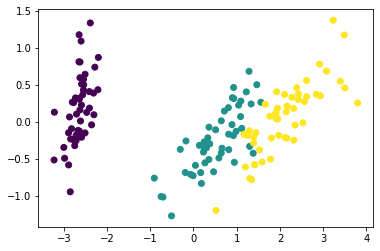

In [146]:
from sklearn.decomposition import PCA

# turn species into vector of integers
species_vector = iris_df.species.astype('category').cat.codes

# drop species & create data matrix
data = np.array(iris_df.iloc[:,:-1])

pca = PCA(n_components=2)
projected_data = pca.fit_transform(data)

plt.scatter(projected_data[:,0], projected_data[:,1],
           c = species_vector)

# IYI: try adding a legend!

Text(0.5, 1.0, 'Count by cluster label')

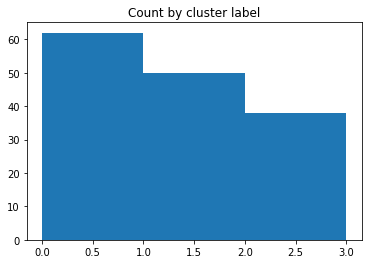

In [147]:
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data)

plt.hist(kmeans.labels_, bins=np.arange(kmeans.labels_.max()+2))
plt.title("Count by cluster label")

Text(0.5, 1.0, 'Clustered labels')

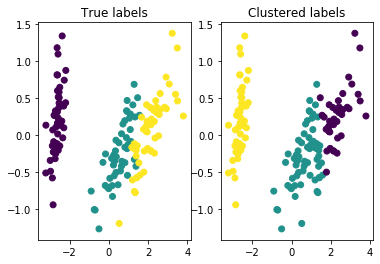

In [148]:
plt.figure()
plt.subplot(121)
plt.scatter(projected_data[:,0], projected_data[:,1],
           c = species_vector)
plt.title("True labels")
plt.subplot(122)
plt.scatter(projected_data[:,0], projected_data[:,1],
           c = optics.labels_)
plt.title("Clustered labels")

In [144]:
tsne = TSNE(n_components=2)
# This is slow, so we only fit on every 10th cell for demonstration purposes
tsne_data = tsne.fit_transform(data)

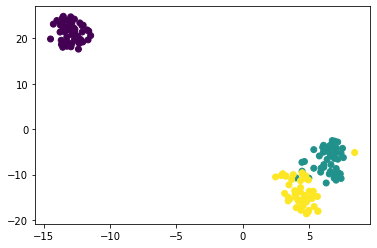

In [145]:
plt.scatter(tsne_data[:,0], tsne_data[:,1],
           c = species_vector)

## Bonus: Variational auto-encoder in PyTorch

This download may take a while, so feel free to just watch :)

In [152]:
!pip install torch torchvision
!mkdir mnist

In [3]:
!python -c "import torch"

In [5]:
import torch

ModuleNotFoundError: No module named 'torch'

In [4]:
import torch
batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True}
mnist_train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./mnist', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
mnist_test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./mnist', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

# shape is batch_size x 1 x 28 x 28

ModuleNotFoundError: No module named 'torch'

Now witness the firepower of this fully armed and operational Notebook!

In [ ]:
TO ADD:
- ANTI-Patterns
- General tips
- second excercise cell? (don't have time for live...)

Logistical details: meet at 4:30 / 4:40? test internet, etc.

As Pretty as Mathematica?

In [ ]:
from matplotlib import cm

In [ ]:
num_clusters = optics.labels_.max()+1 # 0-index
unit_interval_class = optics.labels_ / num_clusters

In [ ]:
colors = [cm.tab20(f) if f>=0 else cm.colors.to_rgba("gray")
          for f in unit_interval_class[::10]]
plt.scatter(tsne_data[:,0], tsne_data[:,1],
            color=colors)

In [ ]:
rgcs_df

In [ ]:
pd.melt?

In [ ]:
rgcs_with_cluster = rgcs_df.copy()
rgcs_with_cluster["cluster"] = optics.labels_
# filter to include only clustered cells
rgcs_with_cluster = rgcs_with_cluster[rgcs_with_cluster.cluster!=-1]
tidy_data = pd.melt(rgcs_with_cluster, id_vars=['retina', 'id', 'ntrials', "cluster"],
        var_name="time_bin",
        value_name="spike_count",
        value_vars=list(map(str, np.arange(35))))
# 100ms time bins
tidy_data["time"] = pd.to_numeric(tidy_data.time_bin) / 10
tidy_data["firing_rate"] = tidy_data.spike_count / tidy_data.ntrials * 10
tidy_data.drop(columns=["spike_count", "ntrials", "time_bin"], inplace=True)
tidy_data

In [ ]:
## Altair

In [ ]:
alt.Chart(tidy_data).mark_line().encode(
    x = "time",
    y = "mean(firing_rate)"
)

In [ ]:
# from hd
from hdbscan import HDBSCAN

In [ ]:
pip install vega_datasets

In [ ]:
import hdbscan

In [ ]:
hdbscan
optics.labels_.max()

In [ ]:
## archive

In [ ]:
cols = "retina,id,i,j,unit_num,ntrials".split(",") + list(map(str,np.arange(3500)))

In [ ]:
csv = pd.read_csv("/home/tyler/Dropbox/Science/manuscripts/2019_acuity_paper/acuity_paper/code/integrity_units_1ms.csv",
                 index_col=False,
                 names=cols)[1:]

In [ ]:
csv = csv[np.logical_not(csv.retina.str.contains("BENAQ"))].drop_duplicates(['id'])

In [ ]:
csv.to_csv("rgc_light_response.csv", index=False)

## Solutions

In [ ]:
cars_df

In [ ]:
line = alt.Chart(cars_df).mark_point().encode(
    x=alt.X('Horsepower', bin=True),
    y=alt.Y('Acceleration', bin=True),
    size="count()"
    
)
line